<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


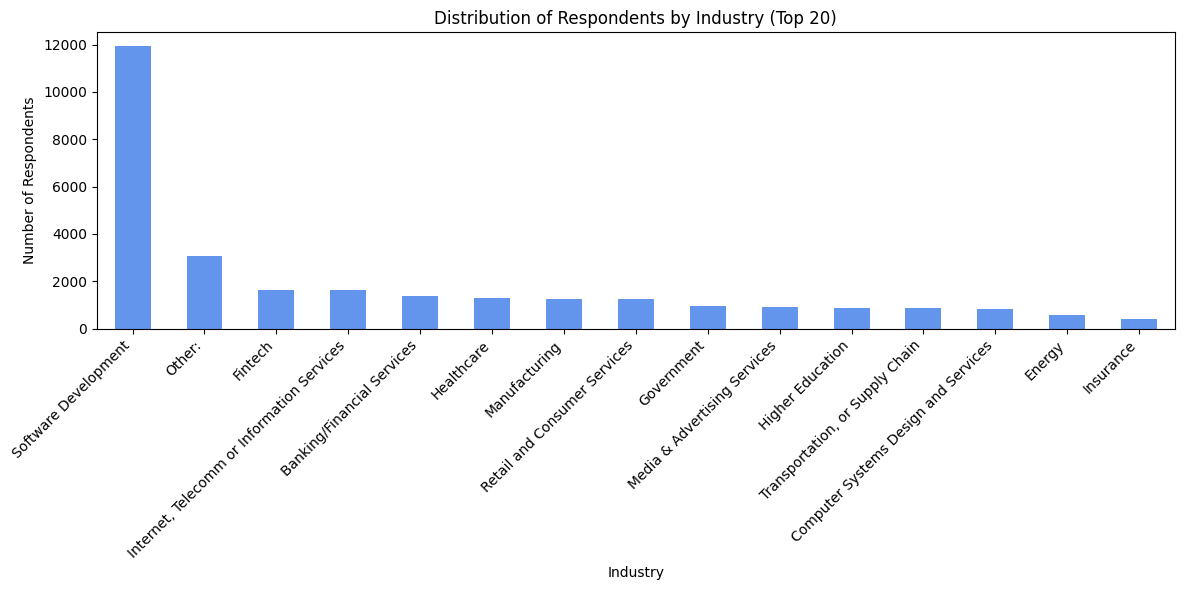

In [3]:
##Write your code here
# Count respondents by Industry
industry_counts = df['Industry'].value_counts().head(20)  # top 20 industries for clarity

plt.figure(figsize=(12,6))
industry_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Distribution of Respondents by Industry (Top 20)')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
comp = df['ConvertedCompYearly'].dropna()

mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print(f"Mean compensation: ${mean_comp:,.2f}")
print(f"Median compensation: ${median_comp:,.2f}")
print(f"Standard deviation: ${std_comp:,.2f}")

# Threshold for extremely high compensation: mean + 3*std
high_comp_threshold = mean_comp + 3*std_comp

high_earners = df[df['ConvertedCompYearly'] > high_comp_threshold]
print(f"Number of extremely high earners (> mean + 3 std): {len(high_earners)}")


Mean compensation: $86,155.29
Median compensation: $65,000.00
Standard deviation: $186,756.97
Number of extremely high earners (> mean + 3 std): 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR: 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Number of outliers based on IQR method: 978


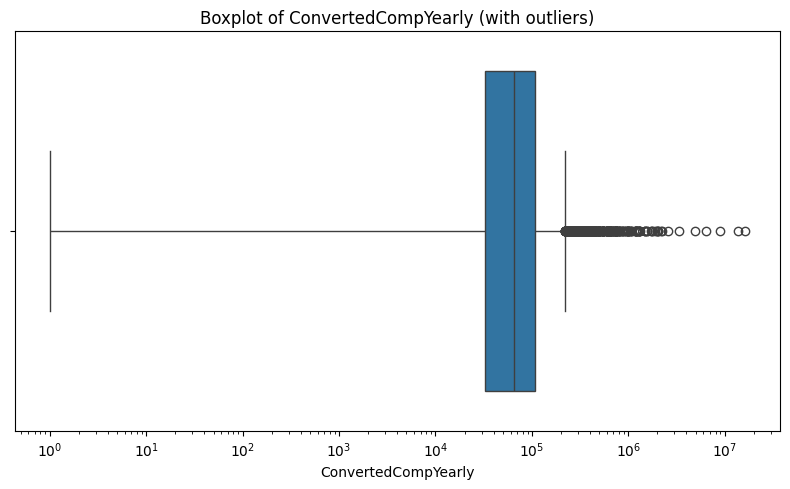

In [5]:
##Write your code here
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers based on IQR method: {len(outliers)}")

# Visualize with box plot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Boxplot of ConvertedCompYearly (with outliers)')
plt.xscale('log')  # log scale can help visualize skewed data better
plt.tight_layout()
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


Original dataset size: 65437
Dataset size after removing outliers: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Missing AgeNum values: 322
WorkExp                0.852538
ConvertedCompYearly    0.120809
JobSatPoints_10       -0.114106
JobSatPoints_11       -0.107043
JobSatPoints_5        -0.101414
JobSatPoints_7        -0.082166
JobSatPoints_9        -0.081523
JobSatPoints_4        -0.075838
JobSat                 0.069917
JobSatPoints_6        -0.050517
JobSatPoints_8        -0.046057
ResponseId            -0.037624
JobSatPoints_1        -0.028206
CompTotal             -0.002829
Name: AgeNum, dtype: float64


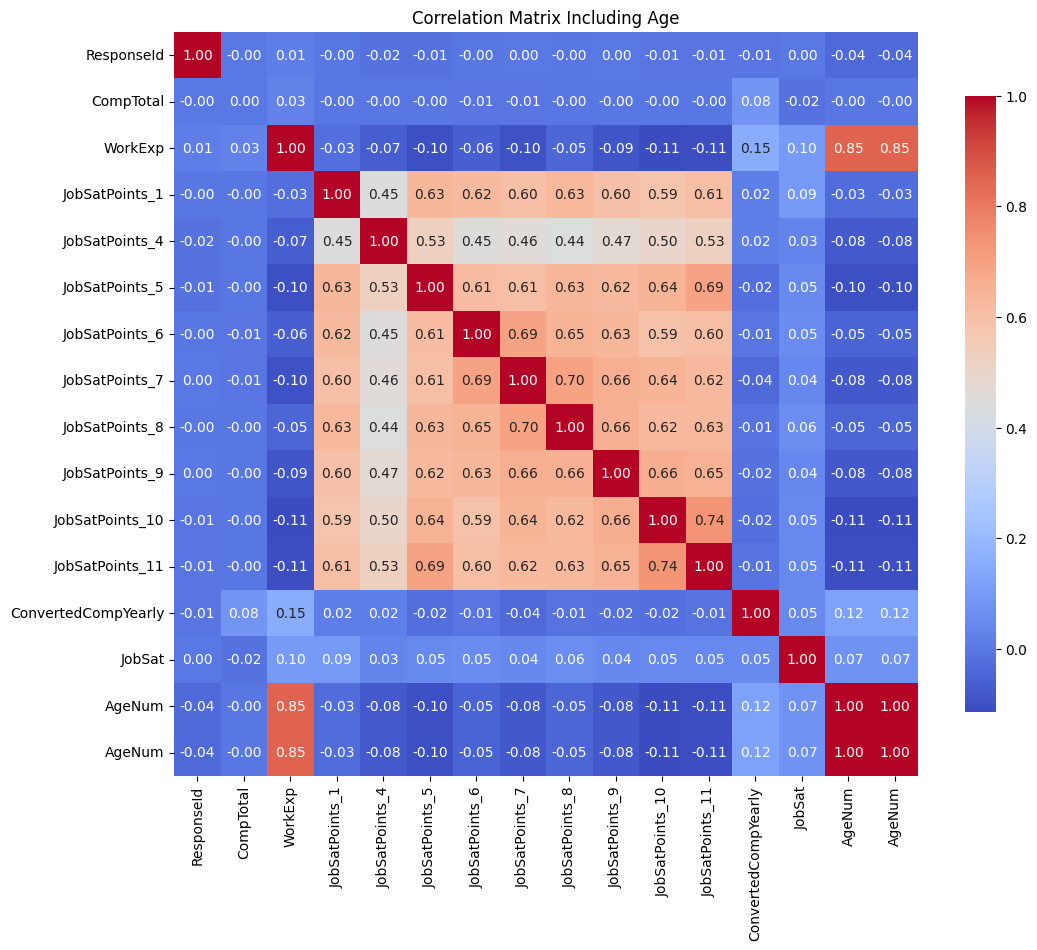

In [14]:
# Example mapping of age groups to approximate numeric values
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
}

# Create a new numeric age column
df['AgeNum'] = df['Age'].map(age_map)

# Check for any missing mappings
missing_ages = df['AgeNum'].isnull().sum()
print(f"Missing AgeNum values: {missing_ages}")

# Ensure age_corrs is a Series
age_corrs = corr_matrix['AgeNum']

if isinstance(age_corrs, pd.DataFrame):
    # If DataFrame, convert to Series by selecting first column
    age_corrs = age_corrs.iloc[:, 0]

age_corrs = age_corrs.drop('AgeNum')
abs_corrs = age_corrs.abs()
sorted_indices = abs_corrs.sort_values(ascending=False).index
age_corrs_sorted = age_corrs.loc[sorted_indices]

print(age_corrs_sorted)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Including Age')
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
